In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/2_Wildfire_Analysis/3_Statistics/Input')
#Output = (''/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/2_Wildfire_Analysis/3_Statistics/Output')
cur_date = '010221'

library(readxl)
library(tidyverse)
library(reshape2)

#reading in file
VSD_df <- data.frame(read_excel("010121_PeatSmolder_24h_Heat_VSD.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(VSD_df)

,Gene,MH101_Saline,MH102_Saline,MH103_Saline,MH104_Saline,MH105_Saline,MH106_Saline,MH77_PeatSmolder,MH78_PeatSmolder,MH79_PeatSmolder,MH80_PeatSmolder,MH81_PeatSmolder,MH82_PeatSmolder
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Akt1,11.003281,11.405806,11.150210,11.085496,11.068735,10.998662,11.005678,10.931603,10.974329,11.114155,11.220136,11.123017
2,Akt1,8.540619,9.642861,9.308177,8.696099,9.203869,8.718452,8.600395,8.641781,8.792715,9.051733,8.837672,9.134914
3,Akt1,9.420492,9.810614,9.622093,9.391960,9.645567,9.301131,9.136177,9.307455,9.116590,9.177149,9.217973,9.267939
4,Camk1,10.500448,10.484847,10.176366,10.297629,9.800202,9.962239,9.814381,9.919391,9.712747,9.652901,9.697479,9.624922
5,Camk1,9.295404,9.075587,8.905867,8.978652,8.501857,8.750412,8.756512,8.644964,8.577792,8.474335,8.267603,8.585069
6,Cybb,6.363802,6.049750,5.953556,5.627913,5.731032,6.107594,6.414371,6.246107,6.410528,6.566475,6.361138,6.201935


Visualizing data's distribution of each gene comparing VSD counts (with SVA) in unexposed (Saline) vs. exposed (Peat Smolder) samples by plotting box plots.

In [3]:
#changing column names to Saline or Peat Smolder
colnames(VSD_df)[2:6] = c('Saline')
colnames(VSD_df)[7:13] = c('Peat Smolder')
colnames(VSD_df)

[1] "Gene"         "Saline"       "Saline"       "Saline"       "Saline"      
 [6] "Saline"       "Peat Smolder" "Peat Smolder" "Peat Smolder" "Peat Smolder"
[11] "Peat Smolder" "Peat Smolder" "Peat Smolder"

In [4]:
#need to melt df to allow for easier visualization with ggplot
melted_VSD_df = melt(VSD_df, variable = 'Treatment', value.name = 'VSD')
head(melted_VSD_df)

Using Gene as id variables



,Gene,Treatment,VSD
,<chr>,<fct>,<dbl>
1,Akt1,Saline,11.003281
2,Akt1,Saline,8.540619
3,Akt1,Saline,9.420492
4,Camk1,Saline,10.500448
5,Camk1,Saline,9.295404
6,Cybb,Saline,6.363802


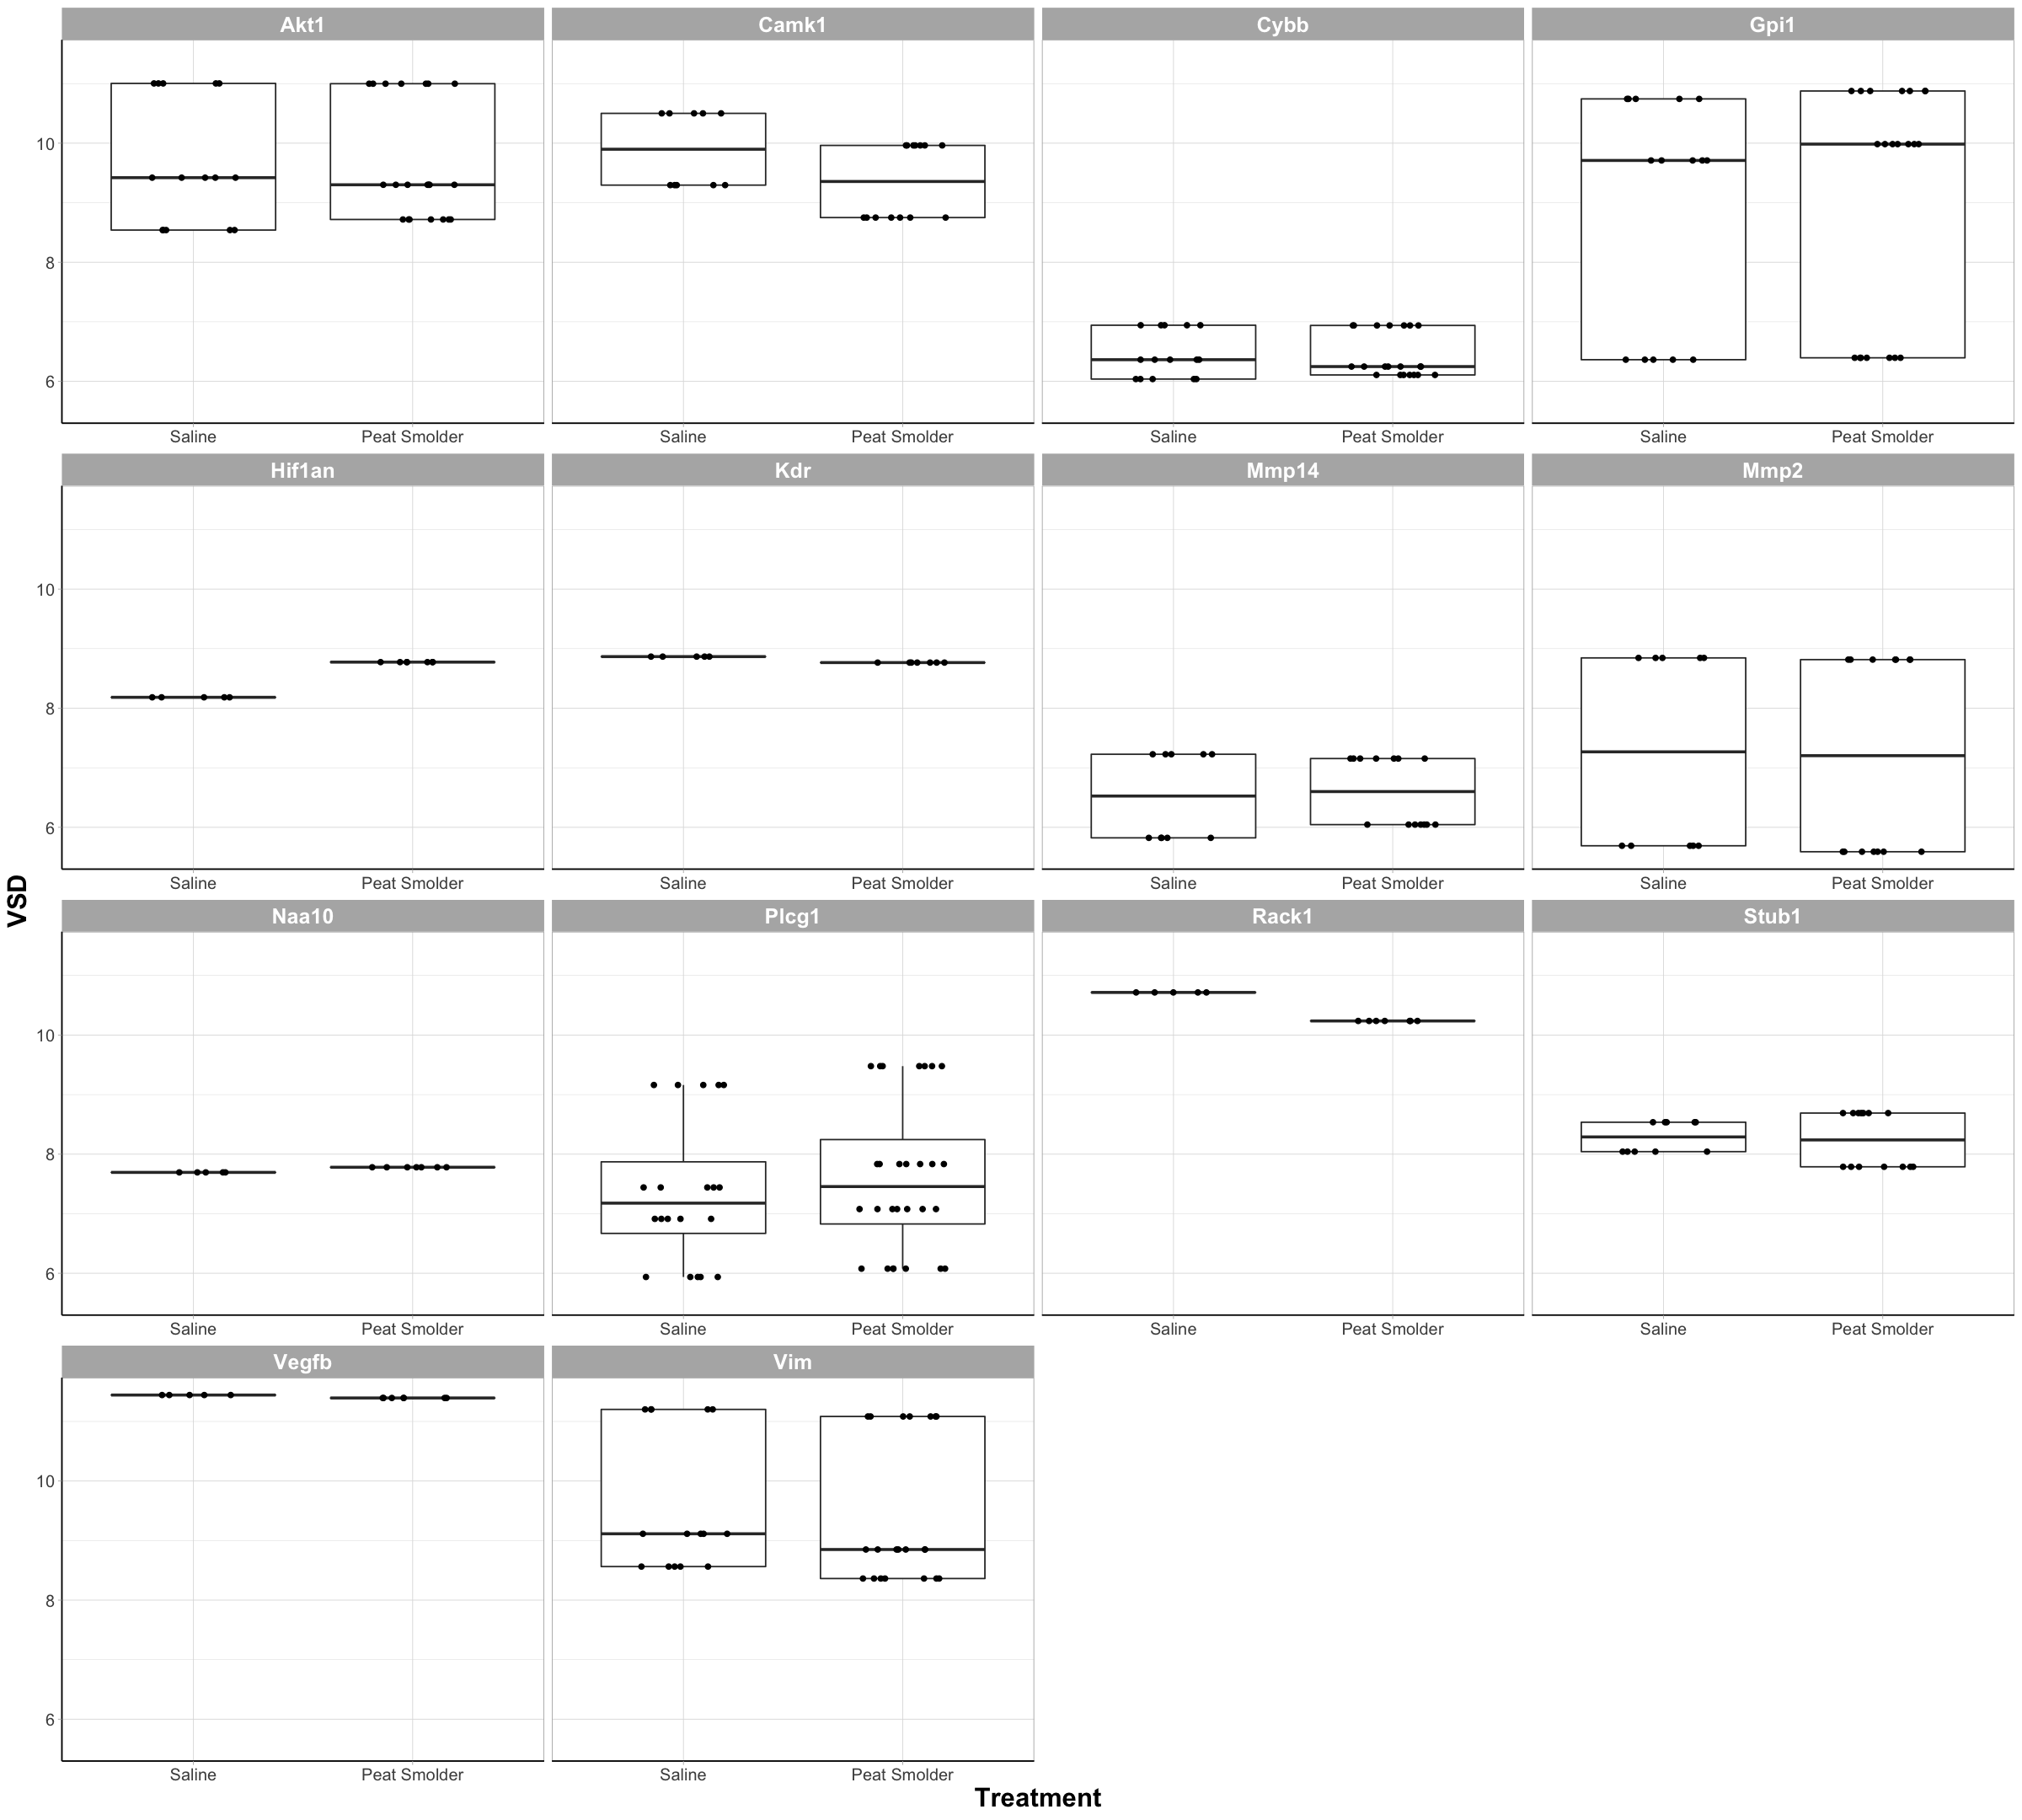

In [5]:
options(repr.plot.width= 20, repr.plot.height= 18) #changing size
ggplot(data = melted_VSD_df, aes(x = Treatment, y = VSD)) + 
  geom_boxplot() + 
  geom_point(position = position_jitter(h = 0, w = 0.2)) +
  facet_wrap(~Gene, scales = 'free_x') +

  theme_light() + 

  theme(legend.position = "none", #removing legend
        axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold"))  #changes size of facet y axis 